<a href="https://colab.research.google.com/github/tiyashapal22/mail_attachment_to_database/blob/main/Python_Assessment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing All the Modules

import seaborn as sns
import pandas as pd
import numpy as np
from google.colab import files
from IPython.display import HTML
import plotly.express as px

In [ ]:
# Miscellaneous
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1500)
pd.set_option('display.width', 100000)

In [ ]:

## ----------------------------------
## Data Loading                     |
## ----------------------------------

uploaded = files.upload()
df = pd.read_csv('Students Social Media Addiction (1).csv')

# __________________________________________________________
# Basic Structure

print(df)
print(df.shape)
print(df.dtypes)

     Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  Mental_Health_Score Relationship_Status  Conflicts_Over_Social_Media  Addicted_Score
0             1   19  Female  Undergraduate  Bangladesh                    5.2          Instagram                          Yes                    6.5                    6     In Relationship                            3               8
1             2   22    Male       Graduate       India                    2.1            Twitter                           No                    7.5                    8              Single                            0               3
2             3   20  Female  Undergraduate         USA                    6.0             TikTok                          Yes                    5.0                    5         Complicated                            4               9
3             4   18    Male    High School          UK 

In [ ]:
## ----------------------------------
## Data Cleaning                    |
## ----------------------------------

# __________________________________________________________
# Checking missing values

print(df.isnull().values.any())

# __________________________________________________________
# Correcting the data type if any

object_cols = df.select_dtypes(include='object').columns
df[object_cols] = df[object_cols].astype('string')
print(df.dtypes)


False
Student_ID                               int64
Age                                      int64
Gender                          string[python]
Academic_Level                  string[python]
Country                         string[python]
Avg_Daily_Usage_Hours                  float64
Most_Used_Platform              string[python]
Affects_Academic_Performance    string[python]
Sleep_Hours_Per_Night                  float64
Mental_Health_Score                      int64
Relationship_Status             string[python]
Conflicts_Over_Social_Media              int64
Addicted_Score                           int64
dtype: object


Text(0.05, -1.8, 'The average daily usage\nof Females is slightly higher than Males')

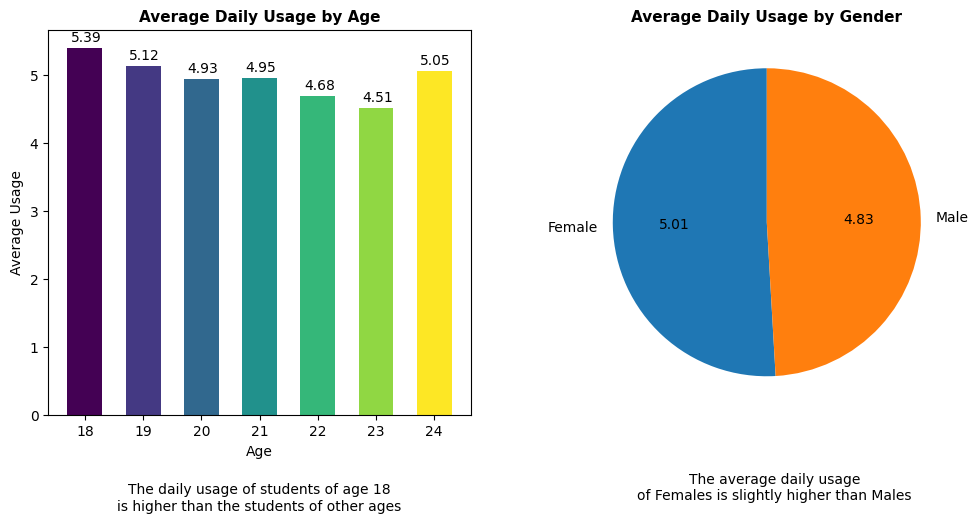

In [ ]:
## ----------------------------------
## Exploratory Data Analysis (EDA)  |
## ----------------------------------

import matplotlib.pyplot as plt

# __________________________________________________________
# Relationship Between Average Daily Usage and Age

def addlabels(ax,x,y):
  for i, j in zip(x, y):
    ax.annotate(f'{j}', xy=(i, j), xytext=(-10,5),textcoords='offset points')

average_usage_by_age = df.groupby('Age')['Avg_Daily_Usage_Hours'].mean().round(2)
label = average_usage_by_age.index.values
values = average_usage_by_age.values
colors = plt.cm.viridis(np.linspace(0, 1, len(values)))

fig,ax = plt.subplots(1,2,figsize=(12,5))
ax[0].bar(label,values,width=0.6,color = colors)
addlabels(ax[0],label,values)
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Average Usage')
ax[0].set_title('Average Daily Usage by Age',fontweight='bold',fontsize=11)
ax[0].text(21,-1.4, 'The daily usage of students of age 18\nis higher than the students of other ages', ha='center', fontsize=10)

# __________________________________________________________
# Relationship Between Average Daily Usage and Gender

average_usage_by_gender = df.groupby('Gender')['Avg_Daily_Usage_Hours'].mean().round(2)
label = average_usage_by_gender.index
values = average_usage_by_gender.values
#print(average_usage_by_gender)

ax[1].pie(average_usage_by_gender, labels=label,
        autopct=lambda pct: f'{round((pct * sum(values) / 100.0),2)}',
        startangle=90)

ax[1].set_title('Average Daily Usage by Gender',fontweight='bold',fontsize=11)
ax[1].text(0.05,-1.8, 'The average daily usage\nof Females is slightly higher than Males', ha='center', fontsize=10)


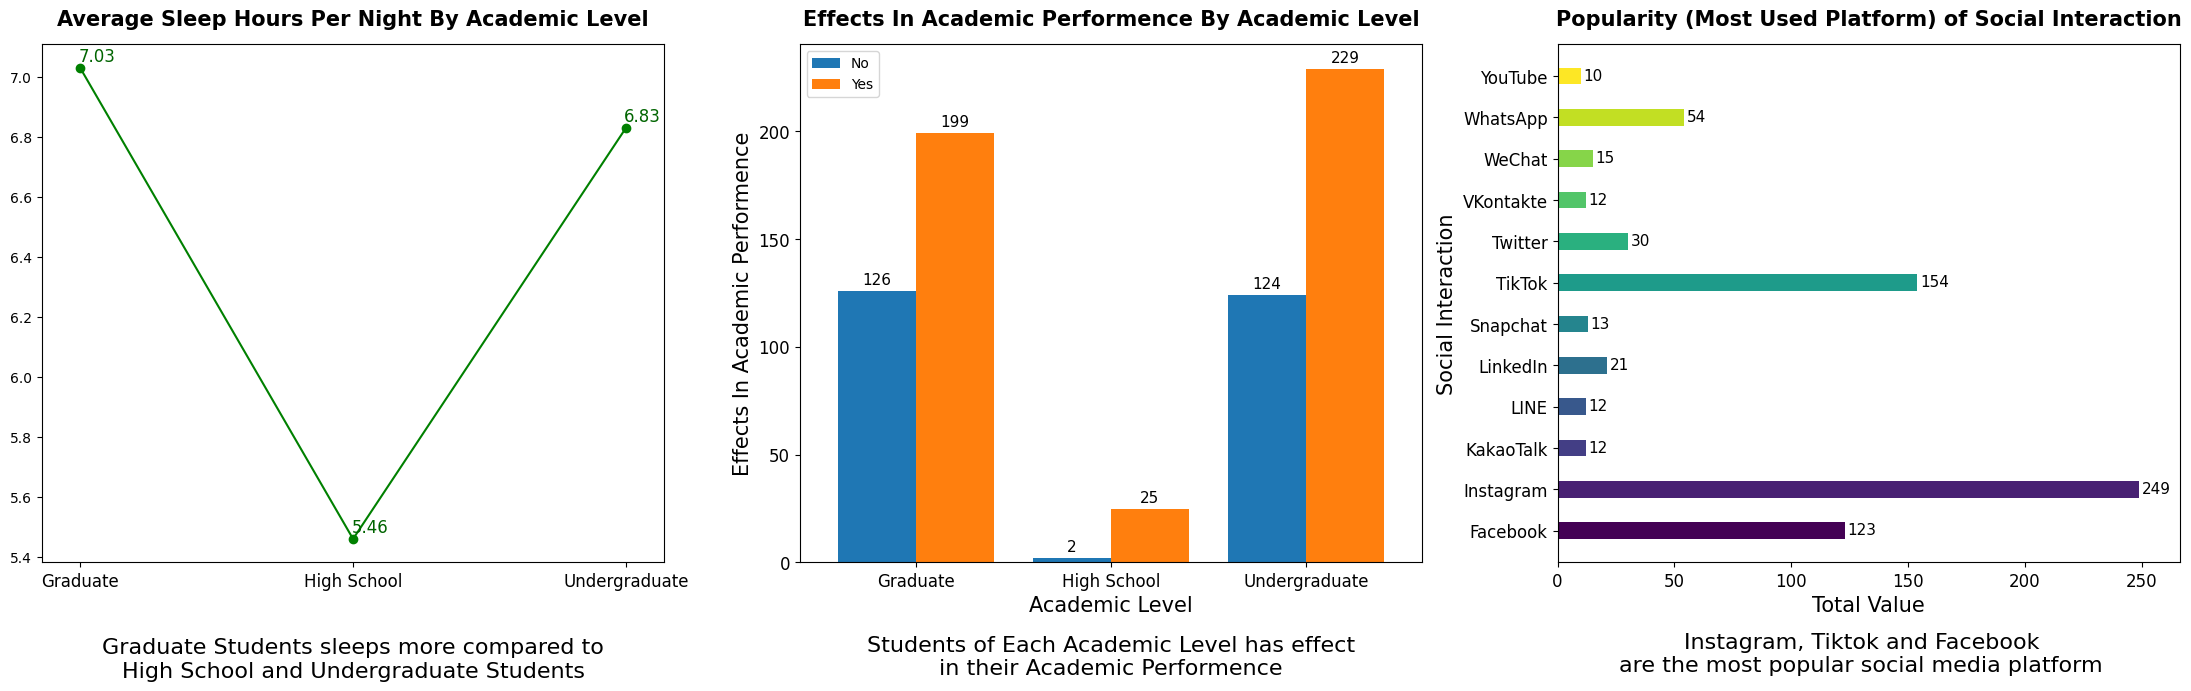

In [ ]:
# __________________________________________________________
# Understanding Sleep Pattern

average_sleep_hour_by_age = df.groupby('Academic_Level')['Sleep_Hours_Per_Night'].mean().round(2)
#print(average_sleep_hour_by_age)
label = average_sleep_hour_by_age.index
values = average_sleep_hour_by_age.values

fig,ax = plt.subplots(1,3,figsize=(22,7))
ax[0].plot(label,values,marker='o',color="green",linestyle='-')
for i in range(len(label)):
    ax[0].annotate(
        f'{values[i]}',                 # Text to display
        (label[i], values[i]),          # Point to annotate
        textcoords="offset points",     # Position relative to point
        xytext=(12,8),                 # Offset: (x, y)
        ha='center',                    # Horizontal alignment
        va = 'center',                  # Vertical alignment
        fontsize=12,
        color='darkgreen'
    )
ax[0].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[0].margins(x=0.07)
ax[0].set_title("Average Sleep Hours Per Night By Academic Level",fontweight='bold',fontsize=15,y=1.02)
ax[0].text(1, 5, 'Graduate Students sleeps more compared to\nHigh School and Undergraduate Students', ha='center', fontsize=16)

# __________________________________________________________
# Understanding Effects In Academic Performence

aca_per_by_aca_level = df.groupby(['Academic_Level','Affects_Academic_Performance'])['Affects_Academic_Performance'].count().round(2).unstack()
label = aca_per_by_aca_level.index
values = aca_per_by_aca_level.values
bar1 = [int(item[0]) for item in values]
bar2 = [int(item[1]) for item in values]

# Bar width and x locations
w, x = 0.4, np.arange(len(label))

ax[1].bar(x - w/2, bar1, width=w, label='No')
ax[1].bar(x + w/2, bar2, width=w, label='Yes')

ax[1].set_xticks(x)
ax[1].set_xticklabels(label)
ax[1].set_xlabel('Academic Level',fontsize=15)
ax[1].set_ylabel('Effects In Academic Performence',fontsize=15)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].margins(x=0.07)
ax[1].set_title('Effects In Academic Performence By Academic Level',fontweight='bold',fontsize=15,y=1.02)
ax[1].legend()
ax[1].text(1,-52, 'Students of Each Academic Level has effect\nin their Academic Performence', ha='center', fontsize=16)


for p in ax[1].patches:
    ax[1].annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 8),
                   fontsize = 11,
                   textcoords='offset points'
                   )
pos=ax[1].get_position()
new_pos=[pos.x0-0.1,pos.y0,pos.width,pos.height]
ax[1].set_position(new_pos)

# __________________________________________________________
# Social Interaction

def addlabels_barh(ax,x,y):
  for i, j in zip(x, y):
    ax.annotate(f'{i}', xy=(i,j), xytext=(2, -3),textcoords='offset points',fontsize = 11)

social_interaction_by_aca_level = df.groupby('Most_Used_Platform')['Most_Used_Platform'].count()
label = social_interaction_by_aca_level.index
values = social_interaction_by_aca_level.values
colors = plt.cm.viridis(np.linspace(0, 1, len(values)))
ax[2].barh(label,width=values,height=0.4,color=colors)
addlabels_barh(ax[2],values,label)
ax[2].set_xlabel('Total Value',fontsize=15)
ax[2].set_ylabel('Social Interaction',fontsize=15)
ax[2].tick_params(axis='x', labelsize=12)
ax[2].tick_params(axis='y', labelsize=12)
ax[2].set_title('Popularity (Most Used Platform) of Social Interaction',fontweight='bold',fontsize=15,y=1.02)
ax[2].margins(x=0.07)
ax[2].text(130,-3.4, 'Instagram, Tiktok and Facebook\nare the most popular social media platform', ha='center', fontsize=16)
fig.set_tight_layout(True)



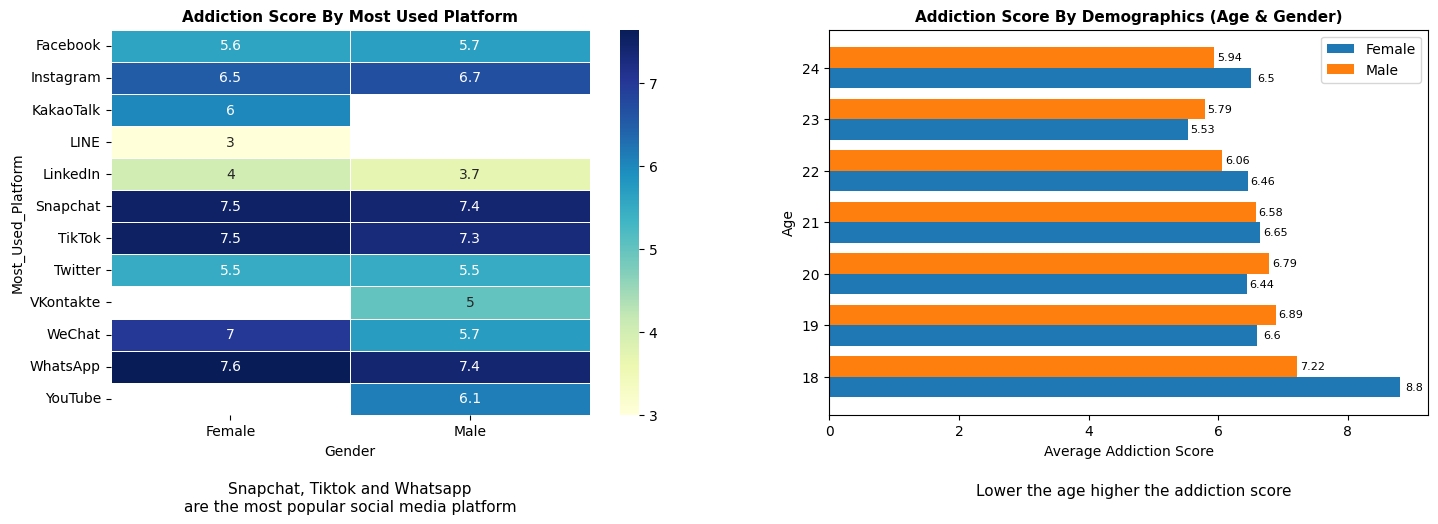

In [ ]:
# __________________________________________________________
# addiction varies across demographics

fig,ax = plt.subplots(1,2,figsize=(17,5))
# addiction score by most used platform
addiction_by_platform = df.groupby(['Most_Used_Platform','Gender'])['Addicted_Score'].mean().round(2).unstack()
label = addiction_by_platform.index
values = addiction_by_platform.values
sns.heatmap(addiction_by_platform, annot=True, cmap='YlGnBu', linewidths=0.5, ax=ax[0])
ax[0].set_title('Addiction Score By Most Used Platform',fontweight='bold',fontsize=11)
ax[0].text(1, 15, 'Snapchat, Tiktok and Whatsapp\nare the most popular social media platform', ha='center', fontsize=11)

# __________________________________________________________
# addiction score by age and gender

addiction_by_age_gen = df.groupby(['Age','Gender'])['Addicted_Score'].mean().round(2).unstack()
label = addiction_by_age_gen.index
values = addiction_by_age_gen.values
bar1 = [float(item[0]) for item in values]
bar2 = [float(item[1]) for item in values]


# Bar Height and x locations
h, y = 0.4, np.arange(len(label))

ax[1].barh(y - h/2, bar1, height=h, label='Female')
ax[1].barh(y + h/2, bar2, height=h, label='Male')

ax[1].set_yticks(y)
ax[1].set_yticklabels(label)
ax[1].set_xlabel('Average Addiction Score')
ax[1].set_ylabel('Age')
ax[1].set_title('Addiction Score By Demographics (Age & Gender)',fontweight='bold',fontsize=11)
ax[1].legend()
ax[1].text(4.7,-2.3, 'Lower the age higher the addiction score', ha='center', fontsize=11)

for p in ax[1].patches:
  ax[1].annotate(format(p.get_width()),
                   (p.get_width(), p.get_y() + p.get_height() / 2),
                   ha='center', va='center',
                   xytext=(15, 0),
                   fontsize = 8,
                   textcoords = 'offset pixels'
                 )

<Figure size 640x480 with 0 Axes>

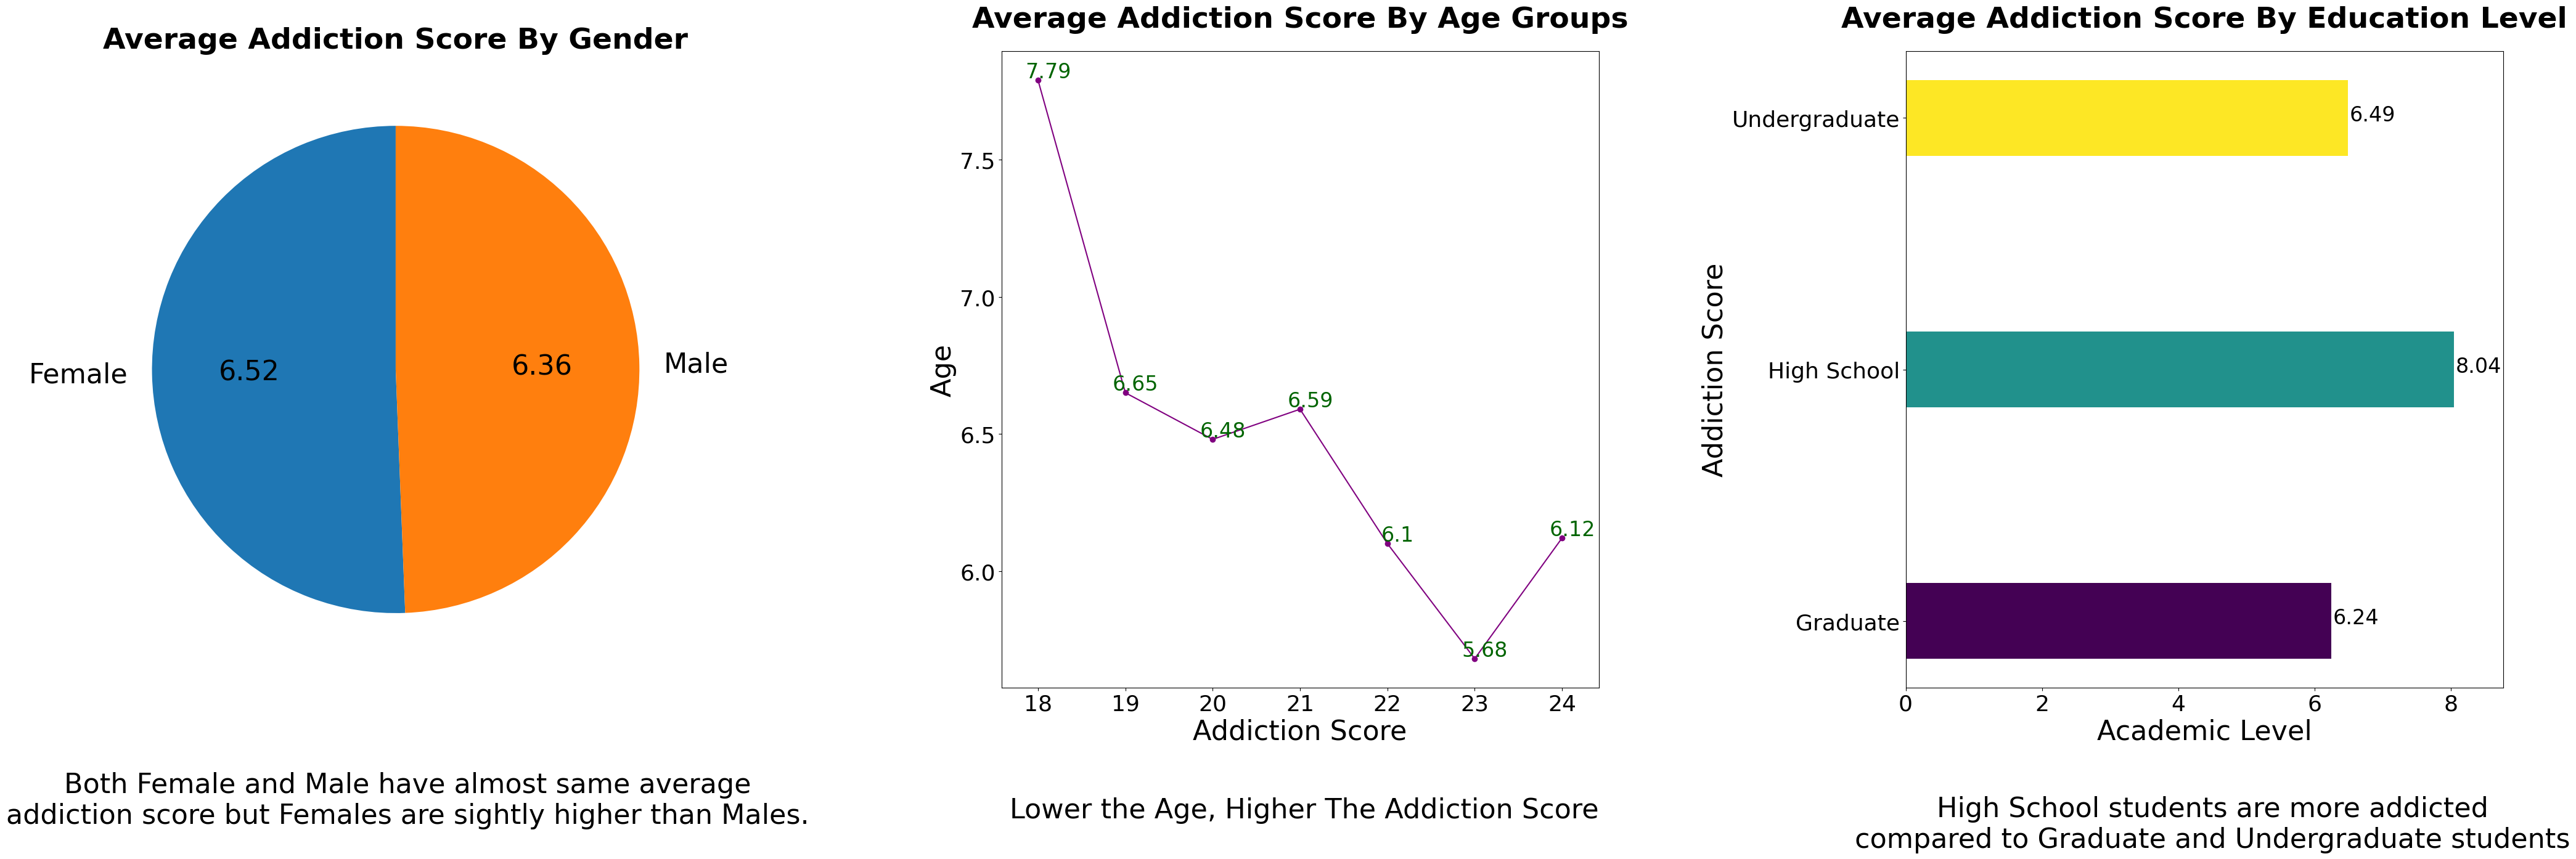

<Figure size 640x480 with 0 Axes>

In [ ]:
## ----------------------------------
## Aggregation & Insights           |
## ----------------------------------

# __________________________________________________________
# Average Addiction Level by gender

average_addic_by_gender = df.groupby('Gender')['Addicted_Score'].mean().round(2)
label = average_addic_by_gender.index
values = average_addic_by_gender.values

fig,ax = plt.subplots(1,3,figsize=(45,14))
ax[0].pie(average_addic_by_gender, labels=label,
        autopct=lambda pct: f'{round((pct * sum(values) / 100.0),2)}',
        startangle=90,
        radius=1.02,
        textprops={'fontsize': 32}
        )

ax[0].set_title("Average Addiction Score By Gender",fontsize=34,fontweight='bold',y=1.03)
ax[0].text(0.05, -1.9, 'Both Female and Male have almost same average\naddiction score but Females are sightly higher than Males.', ha='center', fontsize=32)

# __________________________________________________________
# Average Addiction Level by Age

average_addic_by_age = df.groupby('Age')['Addicted_Score'].mean().round(2)
label = average_addic_by_age.index
values = average_addic_by_age.values
ax[1].plot(label,values,marker='o',color="purple")
ax[1].set_xlabel('Addiction Score',fontsize=32)
ax[1].set_ylabel('Age',fontsize=32)
ax[1].tick_params(axis='x', labelsize=26)
ax[1].tick_params(axis='y', labelsize=26)
ax[1].set_title('Average Addiction Score By Age Groups',fontsize=34,fontweight='bold',y=1.03)
ax[1].text(21.05,5.1, 'Lower the Age, Higher The Addiction Score', ha='center', fontsize=32)
for i in range(len(label)):
    ax[1].annotate(
        f'{values[i]}',                 # Text to display
        (label[i], values[i]),          # Point to annotate
        textcoords="offset points",     # Position relative to point
        xytext=(12,10),                 # Offset: (x, y)
        ha='center',                    # Horizontal alignment
        va = 'center',                  # Vertical alignment
        fontsize=24,
        color='darkgreen'
     )
ax[1].margins(x=0.07)
pos = ax[1].get_position()
new_pos = [pos.x0 - 0.19, pos.y0, pos.width, pos.height]  #shift the subplot slightly to the left side
ax[1].set_position(new_pos)

# __________________________________________________________
# Average Addiction Score By Education Level

def addlabels_barh(ax,x,y):
  for i, j in zip(x, y):
    ax.annotate(f'{i}', xy=(i,j), xytext=(2, -3),textcoords='offset points',fontsize=24)

average_addic_by_academic_level = df.groupby('Academic_Level')['Addicted_Score'].mean().round(2)
label = average_addic_by_academic_level.index.values
values = average_addic_by_academic_level.values
colors = plt.cm.viridis(np.linspace(0, 1, len(values)))
ax[2].barh(label,width=values,height=0.3,color=colors)
addlabels_barh(ax[2],values,label)
ax[2].set_xlabel('Academic Level',fontsize=32)
ax[2].set_ylabel('Addiction Score',fontsize=32)
ax[2].tick_params(axis='x', labelsize=26)
ax[2].tick_params(axis='y', labelsize=26)
ax[2].set_title('Average Addiction Score By Education Level',fontsize=34,fontweight='bold',y=1.03)
ax[2].text(4.5,-0.9, 'High School students are more addicted\ncompared to Graduate and Undergraduate students', ha='center', fontsize=32)
ax[2].margins(x=0.09)
fig.set_tight_layout(True)
plt.figure(constrained_layout=True)



In [ ]:
# __________________________________________________________
# Average Addiction Score By Country

contry_wise_addi_score = df.groupby('Country')['Addicted_Score'].mean().round(2).reset_index()
fig = px.treemap(
    contry_wise_addi_score,
    path=["Country"],  # Hierarchy: World > Region > Country
    values='Addicted_Score',
    color='Addicted_Score'

)

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25),title='<b>Country-wise Average Addiction Score</b>')
fig.update_layout(title_x=0.5)
fig.update_traces(textinfo='label+value',
        textfont=dict(
        family="Arial",  # You can specify a font family
        size=11,         # You can adjust the font size
        weight="bold"    # Set the font weight to bold

    ))

In [ ]:
## ------------------------------------
## Functions, Loops, and Conditionals |
## ------------------------------------

# __________________________________________________________
# Classify risk level (Low/Medium/High) based on usage hours

df['Risk Level'] = df['Avg_Daily_Usage_Hours'].apply(lambda x:"Low" if x<3 else "Medium" if x>=3 and x<6 else "High")
print(df['Avg_Daily_Usage_Hours'],df['Risk Level'])

# __________________________________________________________
# Suggest digital detox strategies based on Risk level

df['Suggetion'] = ["Keep phone out of sight during meals" if x == "Low" else "Replace screen time with hobbies like journaling or walking" if x == "Medium" else "Keep phone in another room during sleep and Join a detox challenge with friends" for x in list(df['Risk Level'])]
print(df['Risk Level'],df['Suggetion'])


0      5.2
1      2.1
2      6.0
3      3.0
4      4.5
      ... 
700    4.7
701    6.8
702    5.6
703    4.3
704    6.2
Name: Avg_Daily_Usage_Hours, Length: 705, dtype: float64 0      Medium
1         Low
2        High
3      Medium
4      Medium
        ...  
700    Medium
701      High
702    Medium
703    Medium
704      High
Name: Risk Level, Length: 705, dtype: object
0      Medium
1         Low
2        High
3      Medium
4      Medium
        ...  
700    Medium
701      High
702    Medium
703    Medium
704      High
Name: Risk Level, Length: 705, dtype: object 0      Replace screen time with hobbies like journali...
1                   Keep phone out of sight during meals
2      Keep phone in another room during sleep and Jo...
3      Replace screen time with hobbies like journali...
4      Replace screen time with hobbies like journali...
                             ...                        
700    Replace screen time with hobbies like journali...
701    Keep phone in anot

In [ ]:
## ----------------------------------
## Storytelling Deliverable         |
## ----------------------------------

display(HTML('<span style="color: teal; font-weight: bold; font-size: 18px;">10 Line Story Summary</span> <br> <span style="color: red; font-weight: bold;">Key Patterns - </span>'))
display(HTML("""
<ul style="font-size:15px; color:blue;">
  <li>By analyze social media usage, the average daily usage is higher for the students of age 18 compared to any other students.</li>
  <li>By explore demographic influences, the average addiction score for both male and female are similar but females addiction score is slightly higher than male.</li>
  <li>High School students addicton score is higher compared to other education levels.</li>
  <li>Snapchat,Tiktok and Whatsapp are the most used social media platforms.</li>
  <li>High school students have the least sleeping hours per night compared to Graduate and Undergraduate students.</li>
</ul>
"""))
display(HTML('<span style="color: red; font-weight: bold;">Root Causes - </span>'))
display(HTML("""
<ul style="font-size:15px; color:blue;">
  <li>The students have the tendency of having less sleep which is affecting the mental health.</li>
  <li>The social media platforms are heavily affecting the youths which deteriorating their academic performance.</li>
</ul>
"""))
display(HTML('<span style="color: red; font-weight: bold;">Recommended actions to combat addiction  - </span>'))
display(HTML("""
<ul style="font-size:15px; color:blue;">
  <li>Set daily screen time limits using built-in phone tools.</li>
  <li>Disable non-essential notifications to reduce distractions.</li>
  <li>Create phone-free zones like bedrooms and study areas.</li>
  <li>Replace scrolling with hobbies like reading or walking.</li>
  <li>Practice meditation to stay present.</li>
</ul>
"""))

